**TIME SERIES FORECASTING FUNDAMENTALS WITH TENSORFLOW**

##GETTING DATA

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-08-17 03:43:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-08-17 03:43:39 (5.58 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



##IMPORTING TIME SERIES WITH PANDA

In [ ]:
import pandas as pd

# Reading Our Bitcoin Data And Parsing The Dates
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
# We Want Closing Price For Each Day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


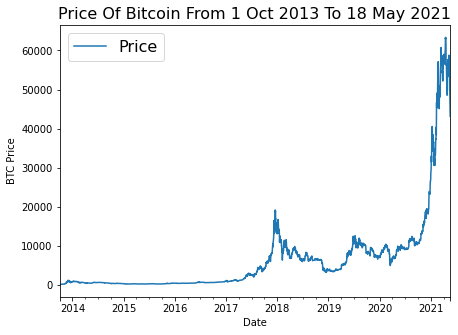

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(7, 5))
plt.ylabel('BTC Price')
plt.title('Price Of Bitcoin From 1 Oct 2013 To 18 May 2021', fontsize=16)
plt.legend(fontsize=16);

## IMPORTING TIME SERIES DATA WITH PYTHON's CSV MODEULE

In [ ]:
# Importing Abd Formatting Historical Bitcoin Data With Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

# Viewing First 10 Of Each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

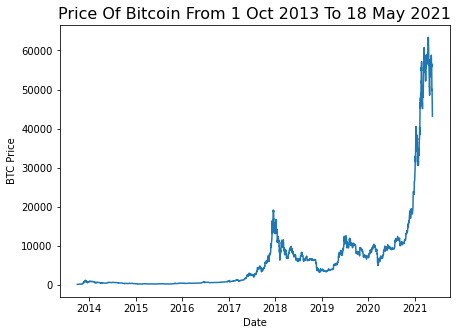

In [ ]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7, 5))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title('Price Of Bitcoin From 1 Oct 2013 To 18 May 2021', fontsize=16);

##FORMAT DATA PART 1 : CREATING TRAIN AND TEST SETS OF OUR TIME SERIES DATA

###CREATING TRAIN AND TEST SETS WITH TIME SERIES DATA (THE WRONG WAY)

In [ ]:
# Getting Bitcoin Date Array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong Way To Make Train/Test Sets For Time Series Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

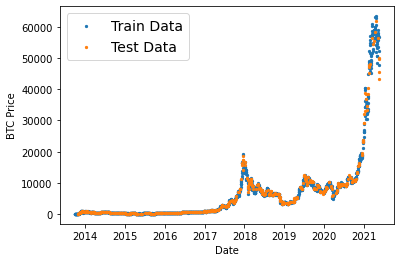

In [ ]:
# Plotting Wrong train And test Splits
#plt.scatter(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

###CREATING TRAIN AND TEST SETS FOR TIME SERIES (THE RIGHT WAY)

In [ ]:
# Creating train And test Splits The Right Way For Time Series Data
split_size = int(0.8 * len(prices))

# Creating train Data Splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Creating test Data Splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

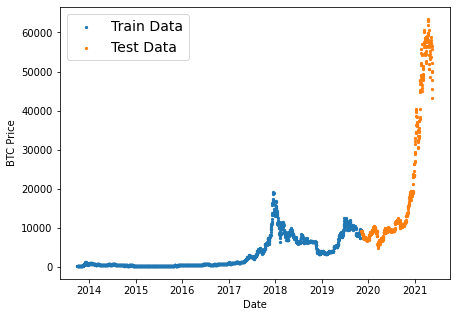

In [ ]:
# Plotting Correctly Made Splits
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

##CREATING A PLOTTING FUNCTION

In [ ]:
# Creating A Function To Plot Time Series Data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  -----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot
  label : label to show on plot about values
  """
  # Plot The Series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('TIME')
  plt.ylabel('BTC PRICE')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

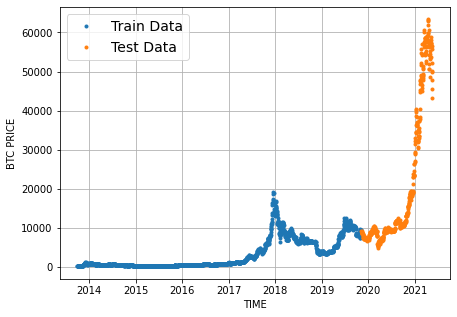

In [ ]:
# Testing Out Plotting Function
plt.figure(figsize=(7, 5))
plot_time_series(timesteps=X_train, values=y_train, label='Train Data')
plot_time_series(timesteps=X_test, values=y_test, label='Test Data')

##MODELLING EXPERIMENTS

##MODEL 0 : NAIVE FORECAST (BASELINE)

In [ ]:
# Creating A Naive Forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

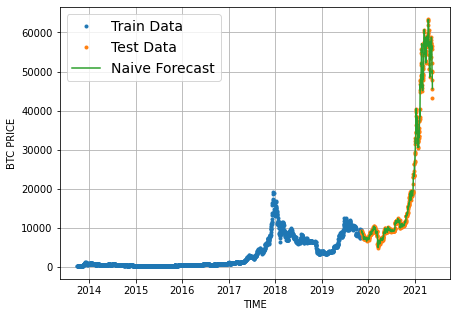

In [ ]:
# Plotting Naive Forecast
plt.figure(figsize=(7, 5))
plot_time_series(timesteps=X_train, values=y_train, label='Train Data')
plot_time_series(timesteps=X_test, values=y_test, label='Test Data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='Naive Forecast')

##EVALUATING A TIME SERIES MODEL

In [ ]:
import tensorflow as tf

In [ ]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implements MASE
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Finding MAE Of Naive Forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Creating A Function Which Takes In Model Predictions And Truth Values, And Returns Evaluation Metrics
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate Various Evaluation Metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.5165248,
 'MASE': 0.99957}

##FORMAT DATA PART 2 : WINDOWING OUR DATASET

In [ ]:
# What We Want To Do With Our Bitcoin Data
print(f'WE WANT TO USE: {btc_price[:7]} TO PREDICT THIS: {btc_price[7]}')

WE WANT TO USE: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] TO PREDICT THIS: 123.033


In [ ]:
# Setting Up Global Varibales For Window And Horizon Size
HORIZON = 1 # Predict Next 1 Day
WINDOW_SIZE = 7 # Use The Past Week Of Bitcoin Data To Make The Prediction

In [ ]:
# Creating Function To Label Windowed Data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates Labels For Windowed Dataset.

  E.g. If horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output:([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Testing Out The Window Labelling Function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Creating Function To View Numpy Arrays As Windows
def make_windows(x, windows_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns A 1D Array Into A 2D Array Of Sequential Labelled Windows Of window_size With horizon_size Labels
  """
  # 1. Creating A Window Specific window_size ( Adds The horizon To The End For Labelling Later)
  window_step = np.expand_dims(np.arange(windows_size+horizon), axis=0)

  # 2. Creating A 2D Array Of Multiple Window Steps (Minus 1 To Account For 0 Indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(windows_size+horizon-1)), axis=0).T # Creates 2D Array Of windows Of Size window_size

  # 3. Index On The Traget Array (A Time series) With 2D Array Of Multiple Window Steps
  windowed_array = x[window_indexes]

  # 4. Get The Labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, windows_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Viewing The First 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i]}, Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ], Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ], Label: [125.96116]


In [ ]:
# Viewing The Last 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i-3]}, Label: {full_labels[i-3]}')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676], Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472], Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361], Label: [43144.47129086]


###TURNING WINDOWS INTO TRAINING AND TEST SETS

In [ ]:
# Making The Train/Test Splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits Matching Pairs Of Windows And Labels Into Train And Test Splits.
  """
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Creating train And test Windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

##MAKING A MODELLING CHECKPOINT CALLBACK

In [ ]:
import os

# Creating A Function To Implement A ModelCheckpoint Callback With A Specific Filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=0,
                                            save_best_only=True)

##MODEL 1 : DENSE (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# 1. Constructing A Model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. Compiling A Model
model_1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fitting The Model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 51ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5828 - val_mae: 2279.5828 - val_mse: 12772095.0000
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9062 - val_loss: 1005.9864 - val_mae: 1005.9864 - val_mse: 3441759.2500
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0312 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 165.0900 - mae: 165.0900 - mse: 145490.8750 - val_loss: 895.2405 - val_mae: 895.2405 - val_mse: 2564606.2500
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 158.5

In [ ]:
# Evaluating Model On Test Data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 662.5322 - mae: 662.5322 - mse: 1358192.1250


[662.5322265625, 662.5322265625, 1358192.125]

In [ ]:
# Loading In The saved Best Performing model_1 And Evaluate It On Test Data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]

##MAKING FORECASTS WITH A MODEL (ON THE TEST DATASET)

In [ ]:
def make_preds(model, input_data):
  """
  Uses Model To Make Predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Making Predictions Using model_1 On The Test Dataset And Viewing Results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
        8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>)

In [ ]:
# Evaluation preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'MAE': 568.5498,
 'MSE': 1172587.6,
 'RMSE': 1082.8608,
 'MAPE': 2.549229,
 'MASE': 0.99878454}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.5165248,
 'MASE': 0.99957}

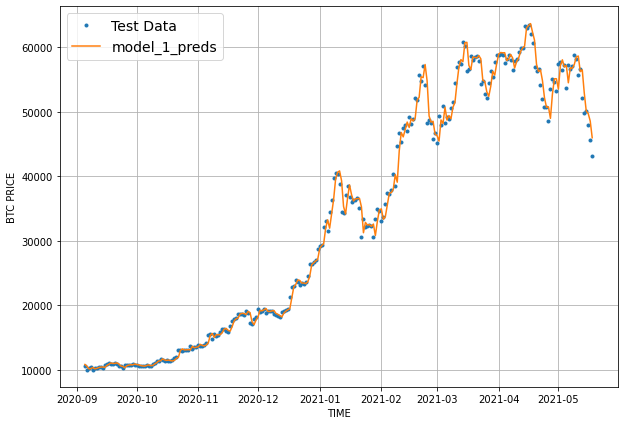

In [ ]:
# Plotting Our model 1 Predictions
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label='model_1_preds')

##MODEL 2 : DENSE (window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Making Windowed Data With Appropriate horizon And window Sizes
full_windows, full_labels = make_windows(prices, windows_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Making training And testing Windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

# Creating Model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON),
], name='model_2_dense')

# Compiling The Model
model_2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam())

# Fitting The Model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluating model_2 On test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 658.0289


658.0288696289062

In [ ]:
# Loading In The Best Performing Model
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 608.8480


608.8480224609375

In [ ]:
# Getting Forecast Predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [ ]:
test_labels.shape, model_2_preds.shape

((552, 1), TensorShape([552]))

In [ ]:
# Evaluating Results For model_2 Predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'MAE': 608.84814,
 'MSE': 1284314.4,
 'RMSE': 1133.276,
 'MAPE': 2.7680664,
 'MASE': 1.0642724}

In [ ]:
model_1_results

{'MAE': 568.5498,
 'MSE': 1172587.6,
 'RMSE': 1082.8608,
 'MAPE': 2.549229,
 'MASE': 0.99878454}

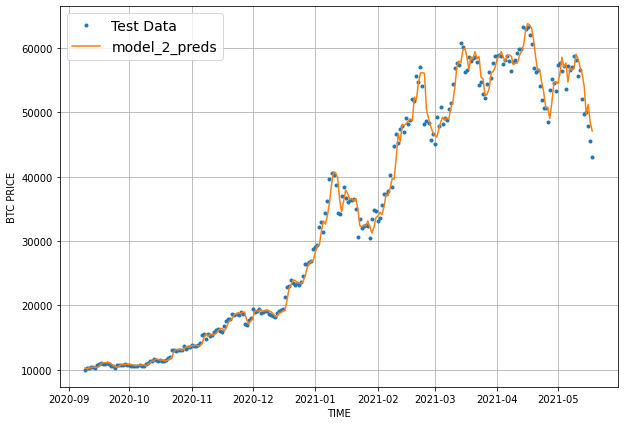

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label='model_2_preds')

##MODEL 3 : DENSE (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, windows_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Creating A Model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

# Compiling The Model
model_3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam())

# Fitting The Model
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 1476.6801 - val_loss: 3088.5391
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 552.8872 - val_loss: 2462.5020
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 435.1955 - val_loss: 2282.7729
Epoch 4/100
18/18 [==============================] - 0s 29ms/step - loss: 391.9522 - val_loss: 1980.5011
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 357.7267 - val_loss: 1985.0293
Epoch 6/100
18/18 [==============================] - 1s 32ms/step - loss: 332.7856 - val_loss: 1754.1522
Epoch 7/100
18/18 [==============================] - 1s 30ms/step - loss: 309.8981 - val_loss: 1590.3005
Epoch 8/100
18/18 [==============================] - 1s 29ms/step - loss: 302.8700 - val_loss: 1565.3329
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 293.6388 - val_loss: 1611.2915
Epoch 10/100
18/18 [==============================] - 0s

In [ ]:
# Evaluating The Model On The Test Data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1322.7781


1322.778076171875

In [ ]:
# Loading The Best Version Of model_3 And Evaluating
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1228.1417


1228.1417236328125

In [ ]:
# Making Predictions With model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9233.328 , 9332.702 , 9363.651 , 9442.775 , 9401.978 , 9414.001 ,
        9280.01  ],
       [8911.084 , 9065.984 , 9113.08  , 9026.601 , 8990.093 , 9000.148 ,
        9053.433 ],
       [8848.506 , 9018.2295, 9006.146 , 8934.578 , 8929.888 , 8856.351 ,
        8958.367 ],
       [9048.449 , 9058.819 , 8966.749 , 9127.248 , 8982.123 , 9056.629 ,
        9002.575 ],
       [8958.309 , 9008.146 , 8827.891 , 8995.736 , 9129.433 , 9099.142 ,
        8881.021 ]], dtype=float32)>

In [ ]:
# Evaluating model_3 Results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'MAE': array([  559.42004 ,   276.0053  ,   298.20258 ,   408.06152 ,
          431.32047 ,   526.28064 ,   542.41644 ,   459.79108 ,
          490.63736 ,   631.6582  ,   802.51654 ,   731.79333 ,
          684.06476 ,   789.71857 ,   563.4593  ,   271.9013  ,
          231.86858 ,   258.64767 ,   277.65277 ,   291.5478  ,
          105.425575,   132.63156 ,   205.97643 ,   262.20816 ,
          169.8651  ,   165.05127 ,   110.21959 ,    83.64655 ,
          115.86182 ,   152.87025 ,   279.98862 ,   380.96127 ,
          280.21414 ,   271.9101  ,   264.43088 ,   261.91315 ,
          330.29108 ,   242.21861 ,   253.72746 ,   245.38596 ,
          412.562   ,   128.63539 ,    88.56452 ,    92.15639 ,
          100.39704 ,   102.41455 ,    74.52804 ,    94.00349 ,
           84.86837 ,    76.64781 ,   108.49679 ,   144.869   ,
          187.69133 ,   162.5261  ,   265.83133 ,   391.21323 ,
          552.2943  ,   541.77313 ,   522.20886 ,   523.98157 ,
          430.13052 ,   276.80893

##MAKING OUR EVALUATION FUNCTION TO WORK FOR LARGER HORIZONS (Tensor With Different Shapes)

In [ ]:
# Creating A Function Which Takes In Model Predictions And Truth Values, And Returns Evaluation Metrics
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate Various Evaluation Metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for Different Sized Metrics (For Longer horizons, Reducing Metrics To A Single Value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()}

In [ ]:
# Evaluating model_3 Results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'MAE': 1228.1416,
 'MSE': 5323686.5,
 'RMSE': 1412.9114,
 'MAPE': 5.4698334,
 'MASE': 2.1854093}

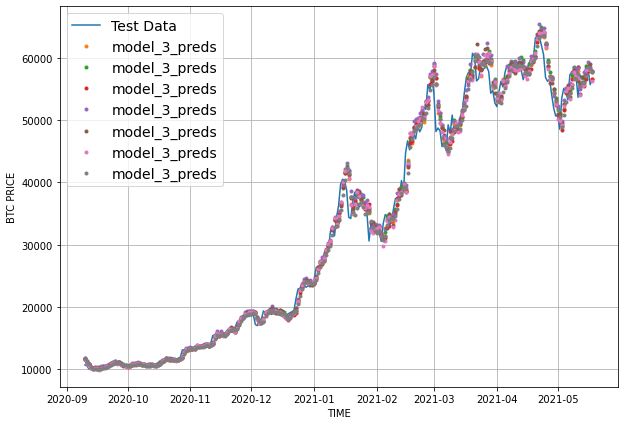

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 format='-',
                 start=offset,
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label='model_3_preds')

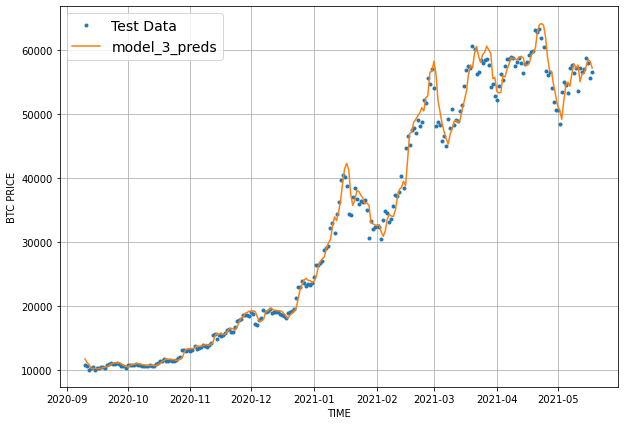

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format='-',                 
                 start=offset,
                 label='model_3_preds')

##BEST PERFORMING MODEL SO FAR (A COMPARISON)

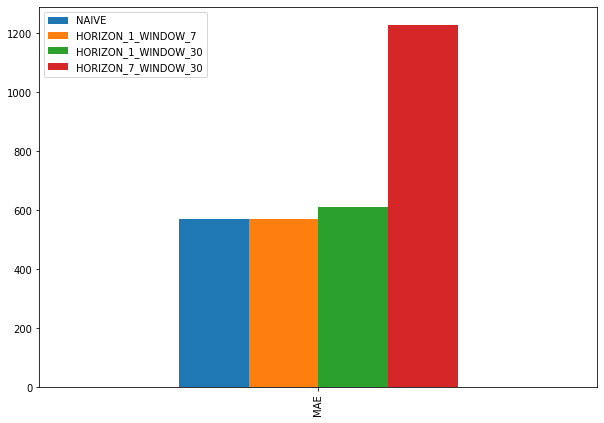

In [ ]:
pd.DataFrame({'NAIVE': naive_results['MAE'],
              'HORIZON_1_WINDOW_7': model_1_results['MAE'],
              'HORIZON_1_WINDOW_30': model_2_results['MAE'],
              'HORIZON_7_WINDOW_30': model_3_results['MAE']}, index=['MAE']).plot(figsize=(10, 7), kind='bar');

##MODEL 4 : Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Creating Windowed Data
full_windows, full_labels = make_windows(prices, windows_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Creating train/test Sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Testing Out Our lambda layer
print(f'ORIGINAL SHAPE: {x.shape}')
print(f'EXPANDED SHAPE: {expand_dims_layer(x).shape}')
print(f'ORIGINAL VALUES WITH EXPANDED SHAPE:\n {expand_dims_layer(x)}')

ORIGINAL SHAPE: (7,)
EXPANDED SHAPE: (7, 1)
ORIGINAL VALUES WITH EXPANDED SHAPE:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

model_4.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating Model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 609.9927


609.99267578125

In [ ]:
# Loading The Best Performing Conv1D And Re-Evaluating
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.3994


570.3993530273438

In [ ]:
# Making Predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8897.537 , 8793.336 , 9025.615 , 8800.965 , 8748.348 , 8769.1875,
       8684.735 , 8543.161 , 8480.019 , 8531.297 ], dtype=float32)>

In [ ]:
# Evaluating Results
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'MAE': 570.39935,
 'MSE': 1182763.1,
 'RMSE': 1087.5492,
 'MAPE': 2.5455725,
 'MASE': 1.0020337}

##MODEL 5 : RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

# Building LSTM Model With The Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM')


model_5.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2544.2009 

18/18 [==============================] - 4s 160ms/step - loss: 2323.6123 - val_loss: 9224.3506
Epoch 2/100
 9/18 [==============>...............] - ETA: 0s - loss: 1004.6306

18/18 [==============================] - 2s 128ms/step - loss: 695.4956 - val_loss: 1485.8942
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 273.3071

18/18 [==============================] - 2s 122ms/step - loss: 237.3010 - val_loss: 1298.9436
Epoch 4/100
10/18 [===============>..............] - ETA: 0s - loss: 200.8831

18/18 [==============================] - 2s 146ms/step - loss: 181.9182 - val_loss: 966.6407
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 173.4021 - val_loss: 970.9384
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 169.3526

18/18 [==============================] - 2s 125ms/step - loss: 172.3319 - val_loss: 891.5209
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 168.9708 - val_loss: 968.6377
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 169.5318 - val_loss: 963.4456
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 167.5760 - val_loss: 956.5829
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 166.3443 - val_loss: 936.8956
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 165.4762 - val_loss: 909.1110
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 169.9951

18/18 [==============================] - 2s 125ms/step - loss: 169.9951 - val_loss: 891.2327
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 160.3806 - val_loss: 898.5595
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 157.6484 - val_loss: 927.9266
Epoch 15/100
18/18 [==============================] - 0s 8ms/step - loss: 167.6508 - val_loss: 982.9256
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 160.4521 - val_loss: 916.0458
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 153.8805 - val_loss: 928.6927
Epoch 18/100
10/18 [===============>..............] - ETA: 0s - loss: 162.7562

18/18 [==============================] - 2s 123ms/step - loss: 152.1556 - val_loss: 865.6219
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 148.8319 - val_loss: 876.9328
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 149.3575

18/18 [==============================] - 3s 151ms/step - loss: 149.6801 - val_loss: 831.2376
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 152.9093

18/18 [==============================] - 2s 125ms/step - loss: 145.7330 - val_loss: 821.0629
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 143.9433 - val_loss: 821.2911
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 143.1268 - val_loss: 837.1895
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 137.9351

18/18 [==============================] - 2s 125ms/step - loss: 141.0378 - val_loss: 808.0547
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 145.0154

18/18 [==============================] - 2s 124ms/step - loss: 139.0068 - val_loss: 787.0112
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 137.9395

18/18 [==============================] - 4s 240ms/step - loss: 137.9395 - val_loss: 769.2203
Epoch 27/100
18/18 [==============================] - 0s 15ms/step - loss: 136.4498 - val_loss: 772.5977
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 135.2745

18/18 [==============================] - 5s 302ms/step - loss: 135.2745 - val_loss: 751.0115
Epoch 29/100
18/18 [==============================] - 0s 12ms/step - loss: 135.5958 - val_loss: 759.8718
Epoch 30/100
18/18 [==============================] - 0s 12ms/step - loss: 138.2377 - val_loss: 789.2983
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 133.7275

18/18 [==============================] - 4s 236ms/step - loss: 133.4514 - val_loss: 730.3293
Epoch 32/100
18/18 [==============================] - 0s 12ms/step - loss: 129.2459 - val_loss: 730.9674
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 129.6380

18/18 [==============================] - 4s 261ms/step - loss: 128.6682 - val_loss: 726.6902
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 131.6328

18/18 [==============================] - 2s 133ms/step - loss: 128.9641 - val_loss: 708.2340
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 125.0531

18/18 [==============================] - 2s 125ms/step - loss: 126.4375 - val_loss: 702.6016
Epoch 36/100
10/18 [===============>..............] - ETA: 0s - loss: 120.9583

18/18 [==============================] - 2s 124ms/step - loss: 125.8648 - val_loss: 696.0234
Epoch 37/100
11/18 [=================>............] - ETA: 0s - loss: 122.4251

18/18 [==============================] - 3s 150ms/step - loss: 124.2744 - val_loss: 692.3998
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 131.0452

18/18 [==============================] - 2s 124ms/step - loss: 123.4617 - val_loss: 682.3129
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 124.4908 - val_loss: 689.1117
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 123.6601 - val_loss: 688.7414
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 127.5033

18/18 [==============================] - 2s 124ms/step - loss: 121.6996 - val_loss: 673.3080
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 122.2319

18/18 [==============================] - 2s 144ms/step - loss: 121.2662 - val_loss: 665.5682
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 121.1914

18/18 [==============================] - 2s 126ms/step - loss: 121.1914 - val_loss: 663.4371
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 121.3492 - val_loss: 666.4625
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 119.2985

18/18 [==============================] - 2s 136ms/step - loss: 119.4222 - val_loss: 653.1441
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 119.8582

18/18 [==============================] - 4s 215ms/step - loss: 119.1475 - val_loss: 649.3669
Epoch 47/100
18/18 [==============================] - 0s 14ms/step - loss: 119.5113 - val_loss: 650.3450
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 116.5687

18/18 [==============================] - 4s 220ms/step - loss: 117.9849 - val_loss: 643.7015
Epoch 49/100
18/18 [==============================] - 0s 13ms/step - loss: 117.3458 - val_loss: 649.1431
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 119.0112 - val_loss: 658.5665
Epoch 51/100
18/18 [==============================] - 0s 13ms/step - loss: 118.3833 - val_loss: 673.2418
Epoch 52/100
18/18 [==============================] - 0s 17ms/step - loss: 118.0016 - val_loss: 644.5724
Epoch 53/100
13/18 [====================>.........] - ETA: 0s - loss: 115.5949

18/18 [==============================] - 3s 205ms/step - loss: 117.5012 - val_loss: 632.1457
Epoch 54/100
18/18 [==============================] - 0s 13ms/step - loss: 117.3330 - val_loss: 637.2055
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 117.3520

18/18 [==============================] - 3s 195ms/step - loss: 115.8615 - val_loss: 627.7058
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 117.1814 - val_loss: 648.4813
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 125.8361 - val_loss: 648.9831
Epoch 58/100
18/18 [==============================] - 0s 11ms/step - loss: 115.4787 - val_loss: 630.3375
Epoch 59/100
18/18 [==============================] - 0s 11ms/step - loss: 114.6559 - val_loss: 628.4244
Epoch 60/100
11/18 [=================>............] - ETA: 0s - loss: 115.8036

18/18 [==============================] - 3s 180ms/step - loss: 114.8021 - val_loss: 620.0607
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3845 - val_loss: 633.4195
Epoch 62/100
18/18 [==============================] - 0s 13ms/step - loss: 114.7735 - val_loss: 653.0529
Epoch 63/100
18/18 [==============================] - 0s 14ms/step - loss: 118.5447 - val_loss: 622.3017
Epoch 64/100
18/18 [==============================] - 0s 13ms/step - loss: 113.3439 - val_loss: 646.4648
Epoch 65/100
18/18 [==============================] - 0s 11ms/step - loss: 115.5774 - val_loss: 621.8207
Epoch 66/100
18/18 [==============================] - 0s 12ms/step - loss: 113.5758 - val_loss: 625.8535
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 112.9395

18/18 [==============================] - 4s 236ms/step - loss: 114.3274 - val_loss: 618.1777
Epoch 68/100
10/18 [===============>..............] - ETA: 0s - loss: 114.0225

18/18 [==============================] - 3s 180ms/step - loss: 115.8874 - val_loss: 610.0667
Epoch 69/100
18/18 [==============================] - 0s 12ms/step - loss: 118.1946 - val_loss: 630.6259
Epoch 70/100
18/18 [==============================] - 0s 14ms/step - loss: 117.6780 - val_loss: 613.6976
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6891 - val_loss: 628.7469
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 115.3159 - val_loss: 613.3113
Epoch 73/100
13/18 [====================>.........] - ETA: 0s - loss: 112.0070

18/18 [==============================] - 3s 177ms/step - loss: 112.2513 - val_loss: 607.5436
Epoch 74/100
18/18 [==============================] - 0s 12ms/step - loss: 113.5405 - val_loss: 612.9193
Epoch 75/100
18/18 [==============================] - 0s 11ms/step - loss: 114.6243 - val_loss: 680.9974
Epoch 76/100
18/18 [==============================] - 0s 14ms/step - loss: 114.3978 - val_loss: 627.7791
Epoch 77/100
18/18 [==============================] - 0s 12ms/step - loss: 115.0701 - val_loss: 677.3135
Epoch 78/100
18/18 [==============================] - 0s 13ms/step - loss: 115.6408 - val_loss: 638.9863
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 111.3614

18/18 [==============================] - 3s 203ms/step - loss: 113.8102 - val_loss: 603.6312
Epoch 80/100
18/18 [==============================] - 0s 14ms/step - loss: 111.6164 - val_loss: 621.9382
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7110 - val_loss: 620.0795
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 113.2746

18/18 [==============================] - 3s 187ms/step - loss: 114.4341 - val_loss: 598.3356
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 112.8585 - val_loss: 607.5803
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 111.8406 - val_loss: 602.6411
Epoch 85/100
18/18 [==============================] - 0s 13ms/step - loss: 111.2613 - val_loss: 627.6544
Epoch 86/100
18/18 [==============================] - 0s 12ms/step - loss: 113.9645 - val_loss: 619.5224
Epoch 87/100
10/18 [===============>..............] - ETA: 0s - loss: 118.1710

18/18 [==============================] - 4s 210ms/step - loss: 113.8286 - val_loss: 598.2933
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 114.5912

18/18 [==============================] - 4s 209ms/step - loss: 110.8448 - val_loss: 596.0640
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 111.0922 - val_loss: 630.6047
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 115.8214 - val_loss: 680.3810
Epoch 91/100
18/18 [==============================] - 0s 13ms/step - loss: 116.0425 - val_loss: 632.1270
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 111.5066

18/18 [==============================] - 4s 232ms/step - loss: 111.9858 - val_loss: 596.0399
Epoch 93/100
18/18 [==============================] - 0s 13ms/step - loss: 111.9554 - val_loss: 601.6699
Epoch 94/100
18/18 [==============================] - 0s 15ms/step - loss: 110.7805 - val_loss: 605.7480
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 108.2304

18/18 [==============================] - 5s 286ms/step - loss: 110.1889 - val_loss: 594.1672
Epoch 96/100
18/18 [==============================] - 0s 14ms/step - loss: 112.3372 - val_loss: 601.4485
Epoch 97/100
18/18 [==============================] - 0s 17ms/step - loss: 110.8521 - val_loss: 625.3636
Epoch 98/100
17/18 [===========================>..] - ETA: 0s - loss: 111.7148

18/18 [==============================] - 6s 335ms/step - loss: 110.8161 - val_loss: 594.1018
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 110.2074

18/18 [==============================] - 4s 258ms/step - loss: 109.7159 - val_loss: 591.6655
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 112.6171 - val_loss: 594.9865


In [ ]:
# Loading In The Best Version Of model_5 And Evaluating On The Test Data
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 4ms/step - loss: 591.6655


591.6654663085938

In [ ]:
# Making Prediction With Our LSTM Model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8970.957, 8815.352, 9026.793, 8831.478, 8736.686], dtype=float32)>

In [ ]:
# Evaluating model_5 Predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'MAE': 591.6655,
 'MSE': 1250831.5,
 'RMSE': 1118.4058,
 'MAPE': 2.66558,
 'MASE': 1.0393925}

##MAKING A MULTIVARIATE TIME SERIES DATASET

In [ ]:
# Making A Multivariate Time Series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Adding The Bitcoin Halving Events To Our Dataset
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block Reward Dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Adding In A block_reward Column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Adding In block_reward values As A Feature To Our DataFrame
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


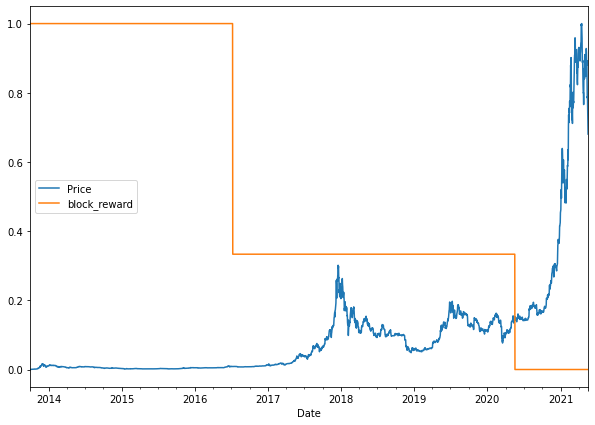

In [ ]:
# Plotting The Block Reward Vs Price Over Time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7));

##MAKING A WINDOWED DATASET WITH PANDAS

In [ ]:
# SettingUp Dataset Hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Making A Copy Of The Bitcoin Historical Data With Block Reward Feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Adding Windowed Columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Creating X (windows) And y (horizons) Features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Making Train And Test Sets Using Indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

##MODEL 6 : DENSE (MULTIVARIATE TIME SERIES)

In [ ]:
tf.random.set_seed(42)

# Making Multivariate Time Series Model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

# Compiling
model_6.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam())

# Fitting
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 4s 121ms/step - loss: 708.7543 - val_loss: 2263.4285
Epoch 2/100
18/18 [==============================] - 1s 86ms/step - loss: 209.3616 - val_loss: 882.9481
Epoch 3/100
18/18 [==============================] - 1s 77ms/step - loss: 155.8645 - val_loss: 819.8914
Epoch 4/100
18/18 [==============================] - 2s 97ms/step - loss: 146.5629 - val_loss: 799.8083
Epoch 5/100
18/18 [==============================] - 1s 66ms/step - loss: 132.3967 - val_loss: 693.0549
Epoch 6/100
18/18 [==============================] - 1s 69ms/step - loss: 125.7844 - val_loss: 659.4625
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 122.0053 - val_loss: 715.5045
Epoch 8/100
18/18 [==============================] - 2s 120ms/step - loss: 120.0705 - val_loss: 636.3275
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 118.8696 - val_loss: 813.4575
Epoch 10/100
18/18 [==============================] - 0s 11ms/

In [ ]:
# Evaluating Multivariate Model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 568.9178


568.9177856445312

In [ ]:
# Loading In And Evaluating Best Performing Model
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 568.3416


568.3416137695312

In [ ]:
# Making Predictions
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8796.549, 8747.235, 9033.413, 8707.096, 8697.279, 8735.311,
       8639.96 , 8471.708, 8437.007, 8505.609], dtype=float32)>

In [ ]:
# Evaluating Predictions To Get Eval Metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'MAE': 568.34155,
 'MSE': 1156009.0,
 'RMSE': 1075.1786,
 'MAPE': 2.5607426,
 'MASE': 0.9984187}

In [ ]:
model_1_results

{'MAE': 568.5498,
 'MSE': 1172587.6,
 'RMSE': 1082.8608,
 'MAPE': 2.549229,
 'MASE': 0.99878454}

##MODEL 7 : N-BEATS ALGORITHM

###BUILDING AND TESTING N-BEATS BLOCK LAYER

In [ ]:
# Creating NBeatBlock Custom Layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block Contains Stack Of 4 Fully Connected Layers Each Has ReLU Activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # Output Of Block Is A Theta Layer With Linear Activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output The Backcast And The Forecast From Theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    
    return backcast, forecast

In [ ]:
# Setting Up Dummy NBeatsBlock Layer To Represent Inputs And Outputs
dummy_nbeats_block_layers = NBeatsBlock(input_size=WINDOW_SIZE,
                                        theta_size=WINDOW_SIZE+HORIZON,
                                        horizon=HORIZON,
                                        n_neurons=128,
                                        n_layers=4)

In [ ]:
# Creating Dummy Inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Passing dummy_inputs To dummy NBeatsBlock Layer
backcast, forecast = dummy_nbeats_block_layers(dummy_inputs)
print(f'BACKCAST: {tf.squeeze(backcast.numpy())}')
print(f'FORECAST: {tf.squeeze(forecast.numpy())}')

BACKCAST: [-0.46348718  0.10944453 -0.43355346  0.9360242  -0.35703537 -0.17927602
 -0.34048367]
FORECAST: -0.4397902190685272


###PREPARING DATA FOR THE N-BEATS ALGORITHM USING tf.data

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Creating N-BEATS Data Inputs (N-BEATS Works With Univariate Time Series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Adding Windowed Columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Making Features And Labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make Train And Test Sets
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Making Our Dataset Performant Using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combining Labels And Features By Zipping Together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch And Prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

###SETTING UP HYPERPARAMETERS FOR N-BEATS ALGORITHM

In [ ]:
# Values From N-BEATS Paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE +  HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

###GETTING READY FOR RESIDUAL CONNECTIONS

In [ ]:
# Making Tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Adding
added = layers.add([tensor_1, tensor_2])

# Getting Outputs
print(f'INPUT TENSORS: {tensor_1.numpy()} & {tensor_2.numpy()}')
print(f'SUBTRACTED TENSORS: {subtracted.numpy()}')
print(f'ADDED TENSORS: {added.numpy()}')

INPUT TENSORS: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
SUBTRACTED TENSORS: [10 10 10 10 10 10 10 10 10 10]
ADDED TENSORS: [10 12 14 16 18 20 22 24 26 28]


###BUILDING, COMPILING AND FITTING THE N-BEATS ALGORITHM

In [ ]:
tf.random.set_seed(42)

# 1. Setting Up An instance Of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

# 2. Creating Input To Stack
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Creating Initial Backcast And Forecast Input (Backwards Prediction + Horizon Prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Creating Stacks Of Block Layers
for i, _ in enumerate(range(N_STACKS-1)):
  
  # 5. Using The NBeatsBlock To Calculate The Backcast As Well As the Forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f'NBeatsBlock_{i}'
  )(residuals)

  # 6. Creating The Double Residual Stacking
  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

# 7. Putting The Stack Model Together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBEATS')

# 8. Compiling Model With MAE Loss
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# 9. Fitting The Model With EarlyStopping And ReduceLROnPlateau Callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])

In [ ]:
# Evaluation N_beats Model On The Test Dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make Predictions With N_BEATS Model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
# Evaluating Predictions To Get Eval Metrics
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
model_1_results

In [ ]:
naive_results

###PLOTTING THE N-BEATS ARCHITECTURE WE'VE CREATED

In [ ]:
# Plotting The N-Beats Model And Inspecting The Architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

##MODEL 8 : CREATING AN ENSEMBLE (STACKING DIFFERENT MODELS TOGETHER)

In [ ]:
HORIZON, WINDOW_SIZE

###CONSTRUCTING AND FITTING AND ENSEMBLE OF MODELS (USING DIFFERENT LOSS FUNCTIONS)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']):
  """
  Reuturns A List Of num_iter Models Each Trained On MAE, MSE And MAPE Loss
  """
  # Making An Empty List For Trained Ensemble Models
  ensemble_models = []

  # Creating num_iter Number Of Models Per Loss Function
  for i in range(num_iter):
    # Building And Fitting A New Model With A Different Loss Function
    for loss_function in loss_fns:
      print(f'Optimizing Model By Reducing: {loss_function} for {num_epochs} epochs, model_number: {i}')

      # Constructing A Simple Model (Similar To model_1)
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(HORIZON)
      ])

      # Compiling A Simple Model With Curent Loss Function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])
      
      # Fitting The Model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      # Appending Fitted Model To List Of Ensemble Models
      ensemble_models.append(model)
  
  return ensemble_models

In [ ]:
# Getting List Of Trained Ensemble Models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

###MAKING PREDICTIONS WITH OUR ENSEMBLE METHOD

In [ ]:
# Creating A Function Which Uses A List Of Trained Models To Make And Return A List Of Predictions
def make_ensemble_preds(ensemble_models):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Creating A List Of Ensemble Predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

In [ ]:
# Evaluating Ensemble Model Predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

###PLOTTING THE PREDICTION INTERVALS OF OUR ENSEMBLE

In [ ]:
# Finding The Upper And Lower Bounds Of Ensemble Predictions
def get_upper_lower(preds):


  # 2. Measuring the Standard Deviation Of The Predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Mulyiplying The Standard Deviation By 1.96
  interval = 1.96 * std

  # 4. Getting The Prediction Interval Upper And Lower Bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return upper, lower

In [ ]:
# Getting The Upper And Lower Bounds Of The 95% Prediction Interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

In [ ]:
# Getting The Median/Mean
ensemble_median = np.median(ensemble_preds, axis=0)

# Plotting The Median Of Our Ensemble preds Along With The Prediction Intervals
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')

# Plotting The Upper And Lower Bounds
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14)

##MODEL 9 : FUTURE PREDICTION MODEL

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Training Model On Entire Data To Make Predictions For The Next Day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()
len(X_all), len(y_all)

In [ ]:
X_all[:5], y_all[:5]

In [ ]:
# Turning Data Into Efficient Running Tensors
features_dataset_all = tf.data.Dataset.from_tesnor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tesnor_slices(y_all)

# Combining features And labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batching And Prefetching For Optimal Performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_9_future_model')

model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

###MAKING PREDITIONS INTO FUTURE

In [ ]:
INTO_FUTURE = 14

In [ ]:
# 1. Creating Function To Make Predictions Into The Future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make Future Forecasts into_future Steps After Values Ends.

  Returns Future Forecasts As A list Of Floats.
  """
  # 2. Creating An Empty List For Future Forecasts/Prepare Data To Forecast On
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Making INTO_FUTURE Number Of Predictions, Altering The Data Which Gets Predicted On Each
  for _ in range(INTO_FUTURE):
    # Predicts On The Last Window Then Appends It Again And Again
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f'PREDICTING ON:\n {last_window} -> PREDICTION: {tf.squeeze(future_pred).numpy()}\n')

    # Appending Predictions To future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy()) 

    # Updating Last Window With New pred And Getting WINDOW_SIZE Most Recent Preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

    return future_forecast

In [ ]:
# Making Forecasts Into The Future
future_forecasts = make_future_forecasts(values=y_all,
                                         model=model_9,
                                         into_future=INTO_FUTURE,
                                         window_size=WINDOW_SIZE)

###PLOTTING FUTURE FORECASTS

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns Array Of datetime Values ranging From start_date To start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, 'D')
  end_date = start_date + np.timedelta64(into_future, 'D')

  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [ ]:
# Last timestep Of timesteps
last_timestep = bitcoin_prices.indes[-1]
last_timestep

In [ ]:
# Getting Next Two Week Of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
# Inserting Last timestep/final price Into next time Steps And Future Forecasts So
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

In [ ]:
# Plotting Future Prices Predictions Of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index,
                 btc_price,
                 start=2500,
                 format='-',
                 label='Actual BTC Price')
plot_time_series(next_time_steps,
                 future_forecast,
                 format='-',
                 label='Predicted BTC Price')

##MODEL 10 : THE TURKEY PROBLEM

In [ ]:
# Introducing The Turkey Problem To BTC Data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_price_turkey[-10:]

In [ ]:
# Getting The Timesteps For The Turkey Problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-:10]

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 start=2500,
                 format='-',
                 label='BTC Price + Turkey Problem')

In [ ]:
# Creating train And test Sets
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

###BUILDING A TURKEY MODEL

In [ ]:
# Cloning Model 1
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'

turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluating The Turkey Model
turkey_model.evaluate(X_test, y_test)

In [ ]:
turkey_model = tf.keras.load_model('')
turkey_model.evaluate(X_test, y_test)

In [ ]:
# Making Predictions
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
# Evaluating turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 start=offset,
                 format='-',
                 label='Turkey Test Data')

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 start=2500,
                 format='-',
                 label='Actual BTC Price')

##COMPARING MODELS

In [ ]:
# Comparing Different Model Results (w = window, h = horizon)
model_results = pd.DataFrame({'NAIVE_MODEL': naive_results,
                              'MODEL_1_DENSE_W7_H1': model_1_results,
                              'MODEL_2_DENSE_W30_H1': model_2_results,
                              'MODEL_3_DENSE_W30_H7': model_3_results,
                              'MODEL_4_Conv1D': model_4_results,
                              'MODEL_5_LSTM': model_5_results,
                              'MODEL_6_MULTIVARIATE': model_6_results,
                              'MODEL_7_NBEATS': model_7_results,
                              'MODEL_8_ENSEMBLE': model_8_results,
                              'MODDEL_10_TURKEY': turkey_results}).T
model_results.head(10)

In [ ]:
# Sorting model_results By MAE And Plotting Them
model_results[['mae']].sort_values(by='mae').plot(figsize=(10, 7), kind='bar');